In [2]:
# Olivia Moyer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib as mpl
from matplotlib import cm


#modules for file imports
import os
import os.path
import urllib

#scikit learn imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from pandas.plotting import scatter_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import FixedLocator, FixedFormatter


#sklearn clustering / unsupervised learning modules
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors

#modules to save data & models
import pickle
import joblib

FileNotFoundError: Could not find module 'C:\Users\ocmkd\anaconda3\lib\site-packages\scipy\.libs\libbanded5x.3OIBJ6VWWPY6GDLEMSTXSIPCHHWASXGT.gfortran-win_amd64.dll' (or one of its dependencies). Try using the full path with constructor syntax.

In [ ]:
def inertia_silhouette_plot( X, k_values): 

    #iterate through different k values and collect inertia values and silhouette scores
    kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, max(k_values)+1)]
    inertias = [model.inertia_ for model in kmeans_per_k]
    silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]    
    
    #print the silhouette scores and k values
    plt.plot(inertias)
    plt.ylabel("Inertia", fontsize=14)
    plt.xlabel("k Value", fontsize=14)
    plt.show()
    print("-"*80)
    #create the plot's figure
    plt.figure(figsize=(10, len(k_values)*3))

    ct = 0 #temp counter variable

    #build a subplot for each value of k
    for k in k_values:
    
        #create the subplot
        ct +=1
        plt.subplot(math.ceil(len(k_values)/2), 2, ct)
    
        #get the predictions and silhouette value
        y_pred = kmeans_per_k[k - 1].labels_
        silhouette_coefficients = silhouette_samples(X, y_pred)

        #create the bars for each cluster
        padding = len(X) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = mpl.cm.Spectral(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

       #plot the silhouette line
        plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
        
        #chart title
        plt.title("k={} --- {:.2}".format(k, silhouette_scores[k - 2]), fontsize=16)
 
        #add a y label for each row and an x axis label for the last 2 graphs
        if ct%2 == 1:
            plt.ylabel("Cluster")
        if ct == len(k_values) or ct==len(k_values)-1:
            #plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
            plt.xlabel("Silhouette Coefficient")
                
    #plot
    plt.show()

In [ ]:
#function to create an Avg. Distance to Nearest Neighbor plt
def nn_avg_distance(X):
    plt.figure(figsize=(10,5))
    nn = NearestNeighbors(n_neighbors=15).fit(X)
    distances, idx = nn.kneighbors(X)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.xlabel("Instances", fontsize=14)
    plt.ylabel("Distances", fontsize=14)
    plt.title("Average Distance to Nearset Neighbor")
    plt.show()

In [ ]:
#function to create a 2 dimmensional representation of data usint tSNE
#needs the independent data as well as the DBSCAN prediction
def dbscan_tsne_plot(X, prediction):
    X_tsne = TSNE(learning_rate=1000, perplexity=25).fit_transform(X)
    plt.figure(1, facecolor='white')
    plt.scatter(
        X_tsne[(prediction!=-1), 0],
        X_tsne[(prediction!=-1), 1],
        s=100,
        alpha=0.85,
        c=prediction[prediction!=-1],
        cmap=cm.Paired
    )
    plt.scatter(
        X_tsne[(prediction==-1), 0],
        X_tsne[(prediction==-1), 1],
        s=100,
        alpha=0.05
    )
    plt.title('T-SNE with DBSCAN Clusters Noted')
    plt.show()

In [3]:
DOWNLOAD_DIR = "datasets/"

#downloads 2 needed files from the book's github repository
if not (os.path.isfile(DOWNLOAD_DIR+'FAANG.csv')):
    DOWNLOAD_ROOT = "https://raw.githubusercontent.com/SueMcMetzger/MachineLearning/main/chpt15/"
    for filename in ('FAANG.csv'):
        url = DOWNLOAD_ROOT + filename
        urllib.request.urlretrieve(url, DOWNLOAD_DIR+filename)
        print("Downloaded", filename)   

HTTPError: HTTP Error 404: Not Found

In [2]:
collegedata= pd.read_csv("datasets/FAANG.csv")
scorecard=pd.read_csv("datasets/CollegeScorecard.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/FAANG.csv'

In [9]:
collegedata.head()

,Institution Name,EnrollmentFullTime,State,Ranking List,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,15-Year NPV,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,Category
0,Adelphi University,6562,NY,USN National University Ranking,166,0.74,60500,B+,318000,888000,8995,38740,28738,0.03,Challenged
1,Agnes Scott College,998,GA,USN National College Ranking,58,0.70,14800,A,213000,596000,10013,41160,229886,0.04,Struggle
2,Albion College,1509,MI,USN National College Ranking,140,0.68,18100,C+,282000,744000,7170,45590,115513,0.02,Struggle
3,Allegheny College,1724,PA,USN National College Ranking,82,0.64,22200,B,277000,773000,10638,47540,128095,0.04,Struggle
4,American University,11435,DC,USN National University Ranking,77,0.32,110000,B,296000,890000,8116,48459,59154,0.03,Thrive


In [10]:
scorecard.head()

,INSTNM,STABBR,PREDDEG,HIGHDEG,CCBASIC,CCUGPROF,CCSIZSET,RELAFFIL,SAT_AVG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,COSTT4_A,AVGFACSAL,PFTFAC
0,Alabama A & M University,AL,3,4,18,10,14,NaN,957.0,0.0186,0.9120,0.0088,0.0018,0.0022,0.0016,22489.0,7101.0,0.7411
1,University of Alabama at Birmingham,AL,3,4,15,9,15,NaN,1220.0,0.5717,0.2553,0.0334,0.0633,0.0034,0.0002,24347.0,10717.0,0.7766
2,Amridge University,AL,3,4,20,5,6,74.0,NaN,0.2393,0.7151,0.0171,0.0057,0.0057,0.0000,17680.0,4292.0,1.0000
3,University of Alabama in Huntsville,AL,3,4,16,15,12,NaN,1314.0,0.7167,0.0969,0.0528,0.0381,0.0095,0.0008,23441.0,9442.0,0.6544
4,Alabama State University,AL,3,4,19,10,14,NaN,972.0,0.0167,0.9352,0.0095,0.0041,0.0013,0.0005,21476.0,7754.0,0.5826


In [11]:
collegedata.info() #ordinal life and category

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Institution Name                           442 non-null    object 
 1   EnrollmentFullTime                         442 non-null    int64  
 2   State                                      442 non-null    object 
 3   Ranking List                               442 non-null    object 
 4   Rank                                       442 non-null    int64  
 5   Undergraduate Admit Rate                   442 non-null    float64
 6   Google Avg Monthly Search Volume           442 non-null    int64  
 7   Student Life Grade                         442 non-null    object 
 8   15-Year NPV                                442 non-null    int64  
 9   30-Year NPV                                442 non-null    int64  
 10  Instructional Wages per Fu

In [12]:
scorecard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   INSTNM      2111 non-null   object 
 1   STABBR      2111 non-null   object 
 2   PREDDEG     2111 non-null   int64  
 3   HIGHDEG     2111 non-null   int64  
 4   CCBASIC     2111 non-null   int64  
 5   CCUGPROF    2111 non-null   int64  
 6   CCSIZSET    2111 non-null   int64  
 7   RELAFFIL    818 non-null    float64
 8   SAT_AVG     1211 non-null   float64
 9   UGDS_WHITE  1852 non-null   float64
 10  UGDS_BLACK  1852 non-null   float64
 11  UGDS_HISP   1852 non-null   float64
 12  UGDS_ASIAN  1852 non-null   float64
 13  UGDS_AIAN   1852 non-null   float64
 14  UGDS_NHPI   1852 non-null   float64
 15  COSTT4_A    1720 non-null   float64
 16  AVGFACSAL   2040 non-null   float64
 17  PFTFAC      1924 non-null   float64
dtypes: float64(11), int64(5), object(2)
memory usage: 297.0+ KB


In [13]:
data=collegedata.merge(scorecard, left_on=['Institution Name','State'],right_on=['INSTNM','STABBR'])

In [14]:
data[data['Institution Name']=='Villanova University']

,Institution Name,EnrollmentFullTime,State,Ranking List,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,15-Year NPV,30-Year NPV,...,SAT_AVG,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,COSTT4_A,AVGFACSAL,PFTFAC
393,Villanova University,7876,PA,USN National University Ranking,46,0.29,60500,A,410000,1169000,...,1407.0,0.7495,0.0488,0.0768,0.0569,0.0006,0.0001,68057.0,11165.0,0.6688


In [15]:
data["Student Life Grade"].value_counts()

A+    88
A-    78
A     77
B+    56
B     54
B-    35
C+    26
C     14
C-     1
D      1
Name: Student Life Grade, dtype: int64

In [16]:
data["Category"].value_counts()

Struggle      129
Survive       124
Challenged     89
Thrive         88
Name: Category, dtype: int64

In [17]:
data['Student Life Grade'].replace(['A+','A','A-','B+','B','B-','C+','C','C-','D'], [10,9,8,7,6,5,4,3,2,1], inplace=True)

In [18]:
data.RELAFFIL.value_counts()

30.0     46
71.0     23
66.0     17
39.0     10
54.0      7
88.0      3
74.0      3
65.0      3
61.0      3
44.0      2
75.0      2
52.0      2
49.0      2
42.0      1
108.0     1
94.0      1
67.0      1
97.0      1
89.0      1
64.0      1
57.0      1
68.0      1
Name: RELAFFIL, dtype: int64

In [19]:
data['RELAFFIL'].fillna(-1,inplace=True)

In [20]:
data['Religious_new']=np.where(data['RELAFFIL']>0,1,0)

In [21]:
data['Religious_new'].value_counts()

0    298
1    132
Name: Religious_new, dtype: int64

In [22]:
data['CCBASIC'].replace([-2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33], ['Not applicable','(Not classified)','Associates Colleges: High Transfer-High Traditional','Associates Colleges: High Transfer-Mixed Traditional/Nontraditional','Associates Colleges: High Transfer-High Nontraditional','Associates Colleges: Mixed Transfer/Career & Technical-High Traditional','Associates Colleges: Mixed Transfer/Career & Technical-Mixed Traditional/Nontraditional','Associates Colleges: Mixed Transfer/Career & Technical-High Nontraditional','Associates Colleges: High Career & Technical-High Traditional','Associates Colleges: High Career & Technical-Mixed Traditional/Nontraditional','Associates Colleges: High Career & Technical-High Nontraditional','Special Focus Two-Year: Health Professions','Special Focus Two-Year: Technical Professions','Special Focus Two-Year: Arts & Design','Special Focus Two-Year: Other Fields','Baccalaureate/Associates Colleges: Associates Dominant','Doctoral Universities: Very High Research Activity','Doctoral Universities: High Research Activity','Doctoral/Professional Universities','Masters Colleges & Universities: Larger Programs','Masters Colleges & Universities: Medium Programs','Masters Colleges & Universities: Small Programs','Baccalaureate Colleges: Arts & Sciences Focus','Baccalaureate Colleges: Diverse Fields','Baccalaureate/Associates Colleges: Mixed Baccalaureate/Associates','Special Focus Four-Year: Faith-Related Institutions','Special Focus Four-Year: Medical Schools & Centers','Special Focus Four-Year: Other Health Professions Schools','Special Focus Four-Year: Engineering Schools','Special Focus Four-Year: Other Technology-Related Schools','Special Focus Four-Year: Business & Management Schools','Special Focus Four-Year: Arts, Music & Design Schools','Special Focus Four-Year: Law Schools','Special Focus Four-Year: Other Special Focus Institutions','Tribal Colleges'
], inplace=True)

In [23]:
data['CCUGPROF'].replace([-2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
], ['Not applicable','Not classified (Exclusively Graduate)','Two-year, higher part-time','Two-year, mixed part/full-time','Two-year, medium full-time','Two-year, higher full-time','Four-year, higher part-time','Four-year, medium full-time, inclusive, lower transfer-in','Four-year, medium full-time, inclusive, higher transfer-in','Four-year, medium full-time, selective, lower transfer-in','Four-year, medium full-time , selective, higher transfer-in','Four-year, full-time, inclusive, lower transfer-in','Four-year, full-time, inclusive, higher transfer-in','Four-year, full-time, selective, lower transfer-in','Four-year, full-time, selective, higher transfer-in','Four-year, full-time, more selective, lower transfer-in','Four-year, full-time, more selective, higher transfer-in'
], inplace=True)

In [24]:
data['PREDDEG'].replace([0,1,2,3,4], ['Not classified','Predominantly certificate-degree granting','Predominantly associates-degree granting','Predominantly bachelors-degree granting','Entirely graduate-degree granting'], inplace=True)

In [25]:
data['HIGHDEG'].value_counts()

4    348
3     82
Name: HIGHDEG, dtype: int64

In [26]:
data['15-Year NPV'].corr(data['30-Year NPV']) # highly correlated variables, indication of multicollinearity

0.9726654077206344

In [27]:
data['Average Undergraduate Tuition and Fees'].corr(data['COSTT4_A']) # highly correlated variables

0.9776090110481895

In [28]:
data['AVGFACSAL'].corr(data['Instructional Wages per Full-Time Student']) #moderatley correlated

0.6551006684558297

In [29]:
data.drop(['15-Year NPV','Ranking List','COSTT4_A','Category', 'HIGHDEG', 'STABBR','RELAFFIL'], axis=1, inplace=True)
#dropped column that has a high correlation with another column

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 0 to 429
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Institution Name                           430 non-null    object 
 1   EnrollmentFullTime                         430 non-null    int64  
 2   State                                      430 non-null    object 
 3   Rank                                       430 non-null    int64  
 4   Undergraduate Admit Rate                   430 non-null    float64
 5   Google Avg Monthly Search Volume           430 non-null    int64  
 6   Student Life Grade                         430 non-null    int64  
 7   30-Year NPV                                430 non-null    int64  
 8   Instructional Wages per Full-Time Student  430 non-null    int64  
 9   Average Undergraduate Tuition and Fees     430 non-null    int64  
 10  Endowment per Full Time St

In [31]:
#no categorical attributes for this data set (nice to have in case data changes)
cat_attribs = ['State', 'PREDDEG', 'CCBASIC','CCUGPROF']

#set the numerical attributes
num_attribs = list( data.drop(['Institution Name','State','PREDDEG','CCBASIC','CCUGPROF','INSTNM'], axis=1) )

#define pipeline for numeric attributes (this code is just a definition)
#each numeric attribute will be imputated using the Median strategy
#each numeric attribute will be scaled 
num_pipeline = Pipeline( [
 ('imputer', SimpleImputer(strategy="median")), #because no missing values, not used
 ('std_scaler', StandardScaler()),   
])

#define the pipeline process for the data set
full_pipeline = ColumnTransformer( [
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(sparse=False), cat_attribs)      
])

In [32]:
X = full_pipeline.fit_transform(data.drop(['Institution Name'], axis=1))
X.shape

(430, 89)

# K Means Analysis

C:\Users\ocmkd\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


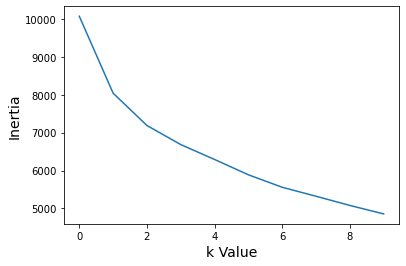

--------------------------------------------------------------------------------


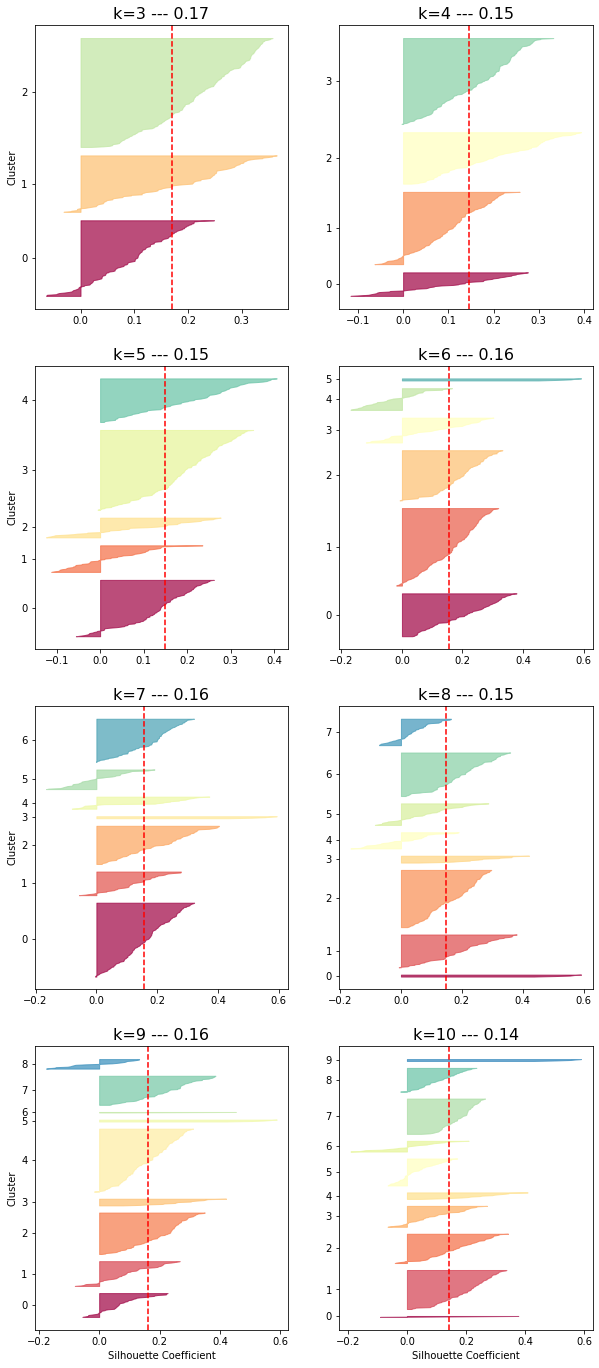

In [33]:
#use this function to evaluate your X data across different k values
#NOTE: this function can take a little time especially if your k value list has numbers > 20
inertia_silhouette_plot(X, [3,4,5, 6, 7, 8, 9, 10])
#higher sil=better; want it higher than the red line and equal distribution

In [34]:
k = 4

#create the model
kmeans = KMeans(n_clusters=k, random_state=42)

#fit the model and predict y values (i.e. cluster value)
y_pred = kmeans.fit_predict(X)

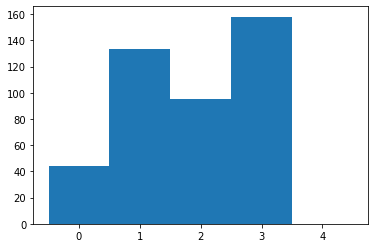

In [35]:
#plot the number of instances in each of the created clusters
plt.hist(y_pred, bins=range(k+2), align='left')
plt.show()

In [36]:
#save the predictions of each instance to a column called KMeans
data[ "KMeans"] = y_pred

In [37]:
data[data['Institution Name']=='Villanova University']

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans
393,Villanova University,7876,PA,46,0.29,60500,9,1169000,12240,53308,...,0.7495,0.0488,0.0768,0.0569,0.0006,0.0001,11165.0,0.6688,1,2


In [41]:
group1=data[data.KMeans == 1]
group1

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans
0,Adelphi University,6562,NY,166,0.74,60500,7,888000,8995,38740,...,0.5012,0.0880,0.1752,0.1116,0.0019,0.0002,12371.0,0.3284,0,1
6,Arizona State University-Tempe,46180,AZ,117,0.85,165000,10,786000,10598,19579,...,0.5008,0.0372,0.2150,0.0800,0.0114,0.0020,11451.0,0.7766,0,1
7,Auburn University,25806,AL,104,0.75,135000,10,748000,6521,20900,...,0.8078,0.0550,0.0342,0.0236,0.0038,0.0005,10428.0,0.8553,0,1
12,Ball State University,15926,IN,192,0.65,60500,8,652000,7465,18182,...,0.7887,0.0842,0.0536,0.0119,0.0001,0.0012,7514.0,0.8101,0,1
23,Binghamton University,15748,NY,79,0.40,90500,7,986000,6712,18251,...,0.5728,0.0515,0.1145,0.1447,0.0007,0.0004,9779.0,0.7128,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Virginia Commonwealth University,25301,VA,162,0.86,27100,9,669000,9220,25164,...,0.4475,0.1965,0.1016,0.1376,0.0017,0.0011,9306.0,0.6226,0,1
403,Washington State University,26683,WA,166,0.77,90500,10,813000,7535,18702,...,0.6081,0.0322,0.1528,0.0606,0.0063,0.0049,9888.0,0.7935,0,1
405,Wayne State University,18746,MI,246,0.71,74000,7,656000,10721,20544,...,0.5857,0.1615,0.0538,0.1001,0.0027,0.0008,10622.0,0.5609,0,1
410,West Virginia University,23846,WV,228,0.82,60500,10,745000,9644,16903,...,0.7975,0.0413,0.0386,0.0154,0.0012,0.0009,10123.0,0.7611,0,1


In [42]:
group1.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans
count,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000,133.000000,133.000000,133.000000,...,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.0
mean,21330.774436,161.060150,0.685489,67527.669173,8.421053,7.702556e+05,8589.105263,21333.887218,33034.037594,0.045940,...,0.560950,0.116189,0.132027,0.076260,0.004219,0.001514,10235.045113,0.745192,0.030075,1.0
std,10952.828960,71.391554,0.153403,58863.350522,1.624670,1.098513e+05,2935.022710,8327.167990,33275.626800,0.034113,...,0.212334,0.174272,0.123142,0.074831,0.007292,0.002562,1522.232162,0.158051,0.171440,0.0
min,2123.000000,29.000000,0.230000,880.000000,3.000000,5.540000e+05,3360.000000,5620.000000,46.000000,0.000000,...,0.001400,0.005100,0.000900,0.000000,0.000100,0.000000,6037.000000,0.328400,0.000000,1.0
25%,13329.000000,104.000000,0.590000,27100.000000,7.000000,6.970000e+05,6459.000000,15327.000000,11773.000000,0.020000,...,0.442200,0.040000,0.052800,0.022200,0.001300,0.000600,9106.000000,0.639000,0.000000,1.0
50%,19387.000000,162.000000,0.710000,60500.000000,9.000000,7.570000e+05,7967.000000,19393.000000,25068.000000,0.040000,...,0.601700,0.068900,0.089800,0.052600,0.002100,0.000900,10177.000000,0.768900,0.000000,1.0
75%,26432.000000,228.000000,0.800000,90500.000000,10.000000,8.310000e+05,10140.000000,24417.000000,42695.000000,0.060000,...,0.722700,0.116400,0.165100,0.102600,0.003900,0.001600,11147.000000,0.859800,0.000000,1.0
max,59220.000000,293.000000,0.960000,368000.000000,10.000000,1.106000e+06,24038.000000,53244.000000,214263.000000,0.160000,...,0.881100,0.970900,0.670000,0.392700,0.055500,0.027200,14426.000000,1.000000,1.000000,1.0


In [598]:
#explore some of the clusters
datak=data[data.KMeans == 2]
datak[40:]

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans
134,Illinois Wesleyan University,1689,IL,80,0.59,5400,8,897000,10221,47636,...,0.6957,0.0617,0.0943,0.0552,0.0000,0.0000,8305.0,0.6119,0,2
141,Kalamazoo College,1457,MI,72,0.73,14800,8,736000,8558,48666,...,0.5788,0.0761,0.1418,0.0705,0.0007,0.0000,7116.0,0.8056,0,2
144,Kenyon College,1721,OH,27,0.36,33100,8,704000,12299,55930,...,0.7027,0.0361,0.0774,0.0361,0.0000,0.0000,8767.0,0.9607,0,2
145,Knox College,1310,IL,66,0.74,14800,7,588000,8143,46554,...,0.4765,0.0827,0.1480,0.0546,0.0000,0.0023,7477.0,0.9344,0,2
146,Lafayette College,2603,PA,39,0.29,49500,8,1062000,11307,53630,...,0.6590,0.0531,0.0700,0.0413,0.0000,0.0000,12104.0,0.8318,1,2
147,Lake Forest College,1477,IL,92,0.58,18100,5,776000,6733,47064,...,0.5750,0.0498,0.1432,0.0518,0.0027,0.0014,8654.0,0.5824,0,2
148,Lawrence University,1420,WI,58,0.62,18100,8,640000,10481,47475,...,0.6261,0.0524,0.0971,0.0510,0.0035,0.0014,8143.0,0.8282,0,2
149,Lehigh University,6093,PA,50,0.22,74000,9,1274000,13918,52930,...,0.6266,0.0346,0.0956,0.0807,0.0010,0.0008,13517.0,0.8270,0,2
157,Loyola Marymount University,8750,CA,64,0.47,60500,9,876000,10223,48522,...,0.4379,0.0705,0.2182,0.0956,0.0005,0.0021,11733.0,0.5547,1,2
162,Macalester College,2140,MN,25,0.41,27100,9,697000,10816,54344,...,0.5829,0.0343,0.0778,0.0801,0.0019,0.0005,10623.0,0.7790,1,2


In [599]:
datak.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans
count,95.000000,95.000000,95.000000,95.000000,95.000000,9.500000e+01,95.000000,95.000000,9.500000e+01,95.000000,...,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0
mean,3943.294737,52.042105,0.400632,43853.578947,7.621053,8.623368e+05,12542.884211,51630.936842,2.941489e+05,0.105789,...,0.589737,0.051339,0.103436,0.078197,0.001969,0.000934,10973.452632,0.786068,0.221053,2.0
std,3569.965778,33.181293,0.176284,30674.780234,1.840322,2.045835e+05,4045.916349,4488.309744,2.834318e+05,0.059922,...,0.123752,0.022435,0.039429,0.056201,0.003127,0.001273,1697.354467,0.157722,0.417157,0.0
min,322.000000,1.000000,0.090000,590.000000,3.000000,3.470000e+05,6733.000000,28774.000000,3.616800e+04,0.020000,...,0.224300,0.000000,0.003000,0.000000,0.000000,0.000000,6431.000000,0.178400,0.000000,2.0
25%,1759.500000,27.000000,0.250000,22200.000000,6.500000,7.395000e+05,9684.500000,49211.000000,1.105400e+05,0.055000,...,0.517200,0.037300,0.077600,0.041450,0.000450,0.000000,9705.500000,0.684500,0.000000,2.0
50%,2365.000000,46.000000,0.390000,40500.000000,8.000000,8.580000e+05,11669.000000,52764.000000,1.783910e+05,0.090000,...,0.607700,0.051200,0.094300,0.058900,0.001200,0.000500,11320.000000,0.827000,0.000000,2.0
75%,5512.000000,74.000000,0.560000,49500.000000,9.000000,9.545000e+05,14167.500000,54789.500000,3.770160e+05,0.140000,...,0.674800,0.063300,0.123950,0.101300,0.002300,0.001350,12160.500000,0.883450,0.000000,2.0
max,19184.000000,153.000000,0.740000,165000.000000,10.000000,1.402000e+06,33452.000000,56960.000000,1.361498e+06,0.330000,...,0.934800,0.161300,0.218200,0.376000,0.026200,0.006200,14628.000000,1.000000,1.000000,2.0


In [600]:
group2=data[data.KMeans == 0]
group2

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans
25,Boston College,13165,MA,37,0.28,165000,10,1109000,13813,55464,...,0.5888,0.0408,0.1097,0.1008,0.0002,0.0003,15323.0,0.6477,1,0
26,Boston University,28287,MA,40,0.22,201000,10,963000,17624,53948,...,0.3741,0.0412,0.1144,0.1595,0.0005,0.0013,14136.0,0.7021,0,0
31,Brown University,9648,RI,14,0.08,165000,10,1035000,17492,55466,...,0.4295,0.0644,0.1146,0.1545,0.0036,0.0015,15579.0,0.8962,0,0
34,California Institute of Technology,2233,CA,12,0.07,14800,8,1376000,51157,52362,...,0.2711,0.0148,0.1382,0.4040,0.0000,0.0000,19993.0,0.9195,0,0
38,Carnegie Mellon University,13160,PA,25,0.17,33100,8,1327000,21069,55465,...,0.2702,0.0410,0.0924,0.3159,0.0003,0.0002,12165.0,0.9521,0,0
39,Case Western Reserve University,10662,OH,40,0.29,60500,7,1141000,17270,49042,...,0.4714,0.0411,0.0782,0.2103,0.0016,0.0008,11878.0,0.7680,0,0
60,Columbia University in the City of New York,26072,NY,3,0.06,301000,10,1348000,57219,59430,...,0.3612,0.0699,0.1347,0.1739,0.0052,0.0010,18763.0,0.4708,0,0
65,Cornell University,23499,NY,17,0.11,201000,10,1216000,16225,55188,...,0.3652,0.0687,0.1353,0.1938,0.0037,0.0009,15156.0,0.9018,0,0
71,Dartmouth College,6436,NH,12,0.09,60500,9,1179000,14866,55453,...,0.5067,0.0603,0.0995,0.1535,0.0172,0.0030,15278.0,0.7969,0,0
80,Duke University,15700,NC,10,0.09,201000,10,1327000,39871,55695,...,0.4247,0.1014,0.0946,0.2204,0.0071,0.0017,16170.0,0.9252,1,0


In [601]:
group2.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans
count,44.000000,44.000000,44.000000,44.000000,44.000000,4.400000e+01,44.000000,44.00000,4.400000e+01,44.000000,...,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.000000,44.0
mean,20953.159091,23.500000,0.183182,153120.454545,9.500000,1.139159e+06,26310.431818,47012.00000,5.282052e+05,0.134545,...,0.406411,0.057250,0.127741,0.196000,0.002225,0.001305,15428.500000,0.801932,0.113636,0.0
std,12806.131086,16.859888,0.121804,152900.876204,0.976467,2.097989e+05,15639.776751,11690.88065,6.710751e+05,0.054237,...,0.119506,0.023724,0.051814,0.080629,0.002944,0.001141,2511.839699,0.134152,0.321038,0.0
min,1559.000000,1.000000,0.040000,14800.000000,6.000000,7.280000e+05,8586.000000,20734.00000,8.452000e+03,0.040000,...,0.134100,0.014800,0.043500,0.047600,0.000000,0.000000,11622.000000,0.470800,0.000000,0.0
25%,12208.250000,10.000000,0.080000,60500.000000,9.000000,9.792500e+05,14758.250000,43848.25000,9.680800e+04,0.110000,...,0.328475,0.040950,0.094325,0.146350,0.000875,0.000400,13421.250000,0.729100,0.000000,0.0
50%,16118.000000,21.500000,0.150000,135000.000000,10.000000,1.099500e+06,19362.500000,52097.00000,2.758185e+05,0.130000,...,0.410200,0.061850,0.113850,0.190350,0.001200,0.000950,15058.000000,0.827300,0.000000,0.0
75%,26625.750000,34.500000,0.265000,174000.000000,10.000000,1.279750e+06,32781.750000,55198.50000,6.210468e+05,0.150000,...,0.473650,0.071450,0.152325,0.228700,0.002250,0.001850,17141.000000,0.897600,0.000000,0.0
max,53129.000000,70.000000,0.520000,1000000.000000,10.000000,1.743000e+06,68315.000000,59430.00000,3.077087e+06,0.370000,...,0.684400,0.108000,0.261000,0.404000,0.017200,0.004300,20484.000000,0.999000,1.000000,0.0


In [46]:
data3=data[data.KMeans == 3]
data3[50:]

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans
128,Hope College,3032,MI,105,0.76,22200,8,684000,7515,34010,...,0.8234,0.0259,0.0739,0.0210,0.0000,0.0000,8367.0,0.6739,1,3
129,Houghton College,937,NY,124,0.95,12100,4,570000,5361,32488,...,0.7217,0.0622,0.0173,0.0408,0.0031,0.0000,6275.0,0.5357,1,3
131,Illinois College,976,IL,136,0.76,18100,7,669000,6150,33090,...,0.7240,0.0989,0.0742,0.0051,0.0031,0.0010,7085.0,0.7576,1,3
135,Immaculata University,1018,PA,211,0.81,18100,4,745000,7296,27350,...,0.7035,0.1556,0.0700,0.0210,0.0008,0.0008,4945.0,1.0000,1,3
140,Juniata College,1348,PA,82,0.70,14800,6,738000,7506,45597,...,0.7600,0.0330,0.0544,0.0345,0.0023,0.0000,8091.0,0.7439,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,Wilkes University,2693,PA,211,0.75,22200,6,785000,8814,36194,...,0.7193,0.0488,0.0657,0.0246,0.0030,0.0008,9093.0,0.4234,0,3
422,Willamette University,2291,OR,68,0.84,18100,4,747000,9327,50279,...,0.6309,0.0197,0.1442,0.0696,0.0068,0.0031,11070.0,0.7254,0,3
423,William Carey University,3103,MS,281,0.68,18100,7,530000,6625,12600,...,0.6190,0.2854,0.0205,0.0068,0.0039,0.0000,6419.0,0.4631,1,3
425,Wittenberg University,1693,OH,160,0.74,18100,7,649000,6045,39500,...,0.7743,0.0982,0.0364,0.0094,0.0029,0.0000,7209.0,0.6821,1,3


In [45]:
data3.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans
count,158.000000,158.000000,158.000000,158.000000,158.000000,1.580000e+02,158.000000,158.000000,158.000000,158.000000,...,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.0
mean,2888.582278,158.056962,0.728418,20955.063291,6.170886,7.083291e+05,8423.006329,36106.050633,72451.335443,0.029747,...,0.692439,0.076972,0.086439,0.033931,0.005465,0.001695,8075.575949,0.707870,0.645570,3.0
std,2221.734346,61.144732,0.113920,14696.718978,1.774530,1.146867e+05,3597.055688,9235.392244,62061.979056,0.024675,...,0.125342,0.060572,0.073160,0.028995,0.012800,0.002759,1193.039758,0.214173,0.479861,0.0
min,140.000000,53.000000,0.390000,210.000000,1.000000,3.290000e+05,3823.000000,10743.000000,6216.000000,0.000000,...,0.186000,0.010400,0.002500,0.003400,0.000000,0.000000,4945.000000,0.165800,0.000000,3.0
25%,1342.250000,114.000000,0.660000,12100.000000,5.000000,6.450000e+05,6871.750000,31962.500000,25419.250000,0.010000,...,0.612625,0.033125,0.045075,0.014725,0.001700,0.000225,7320.000000,0.555975,0.000000,3.0
50%,2024.000000,145.000000,0.730000,18100.000000,6.000000,7.075000e+05,7530.000000,38151.000000,59188.000000,0.020000,...,0.718300,0.058000,0.069050,0.025150,0.002900,0.000900,8003.000000,0.699300,1.000000,3.0
75%,3609.750000,202.000000,0.817500,27100.000000,8.000000,7.727500e+05,9045.250000,42296.750000,93924.000000,0.040000,...,0.779675,0.098175,0.101625,0.039025,0.005400,0.001875,8832.750000,0.900300,1.000000,3.0
max,10390.000000,281.000000,1.000000,90500.000000,10.000000,1.188000e+06,39216.000000,52595.000000,301019.000000,0.140000,...,0.890700,0.339300,0.570800,0.174800,0.137600,0.022500,11873.000000,1.000000,1.000000,3.0


# DBSCAN

In [47]:
for i in range(100,600):
    dbscan=DBSCAN(eps=i/100,min_samples=10)
    y_pred=dbscan.fit_predict(X)
    print("eps: ",i/100, set(list(y_pred))) #5 good clusters at 2.45 ; eps=density distance between instances

eps:  1.0 {-1}
eps:  1.01 {-1}
eps:  1.02 {-1}
eps:  1.03 {-1}
eps:  1.04 {-1}
eps:  1.05 {-1}
eps:  1.06 {-1}
eps:  1.07 {-1}
eps:  1.08 {-1}
eps:  1.09 {-1}
eps:  1.1 {-1}
eps:  1.11 {-1}
eps:  1.12 {-1}
eps:  1.13 {-1}
eps:  1.14 {-1}
eps:  1.15 {-1}
eps:  1.16 {-1}
eps:  1.17 {-1}
eps:  1.18 {-1}
eps:  1.19 {-1}
eps:  1.2 {-1}
eps:  1.21 {-1}
eps:  1.22 {-1}
eps:  1.23 {-1}
eps:  1.24 {-1}
eps:  1.25 {-1}
eps:  1.26 {-1}
eps:  1.27 {-1}
eps:  1.28 {-1}
eps:  1.29 {-1}
eps:  1.3 {-1}
eps:  1.31 {-1}
eps:  1.32 {-1}
eps:  1.33 {-1}
eps:  1.34 {-1}
eps:  1.35 {-1}
eps:  1.36 {-1}
eps:  1.37 {-1}
eps:  1.38 {-1}
eps:  1.39 {-1}
eps:  1.4 {-1}
eps:  1.41 {-1}
eps:  1.42 {-1}
eps:  1.43 {-1}
eps:  1.44 {-1}
eps:  1.45 {-1}
eps:  1.46 {-1}
eps:  1.47 {-1}
eps:  1.48 {-1}
eps:  1.49 {-1}
eps:  1.5 {-1}
eps:  1.51 {-1}
eps:  1.52 {-1}
eps:  1.53 {-1}
eps:  1.54 {-1}
eps:  1.55 {-1}
eps:  1.56 {-1}
eps:  1.57 {-1}
eps:  1.58 {-1}
eps:  1.59 {-1}
eps:  1.6 {-1}
eps:  1.61 {-1}
eps:  1.62 {-1}

eps:  5.39 {0, -1}
eps:  5.4 {0, -1}
eps:  5.41 {0, -1}
eps:  5.42 {0, -1}
eps:  5.43 {0, -1}
eps:  5.44 {0, -1}
eps:  5.45 {0, -1}
eps:  5.46 {0, -1}
eps:  5.47 {0, -1}
eps:  5.48 {0, -1}
eps:  5.49 {0, -1}
eps:  5.5 {0, -1}
eps:  5.51 {0, -1}
eps:  5.52 {0, -1}
eps:  5.53 {0, -1}
eps:  5.54 {0, -1}
eps:  5.55 {0, -1}
eps:  5.56 {0, -1}
eps:  5.57 {0, -1}
eps:  5.58 {0, -1}
eps:  5.59 {0, -1}
eps:  5.6 {0, -1}
eps:  5.61 {0, -1}
eps:  5.62 {0, -1}
eps:  5.63 {0, -1}
eps:  5.64 {0, -1}
eps:  5.65 {0, -1}
eps:  5.66 {0, -1}
eps:  5.67 {0, -1}
eps:  5.68 {0, -1}
eps:  5.69 {0, -1}
eps:  5.7 {0, -1}
eps:  5.71 {0, -1}
eps:  5.72 {0, -1}
eps:  5.73 {0, -1}
eps:  5.74 {0, -1}
eps:  5.75 {0, -1}
eps:  5.76 {0, -1}
eps:  5.77 {0, -1}
eps:  5.78 {0, -1}
eps:  5.79 {0, -1}
eps:  5.8 {0, -1}
eps:  5.81 {0, -1}
eps:  5.82 {0, -1}
eps:  5.83 {0, -1}
eps:  5.84 {0, -1}
eps:  5.85 {0, -1}
eps:  5.86 {0, -1}
eps:  5.87 {0, -1}
eps:  5.88 {0, -1}
eps:  5.89 {0, -1}
eps:  5.9 {0, -1}
eps:  5.91 {0, -1}

In [49]:
#create and fit the model
dbscan = DBSCAN(eps=2.45, min_samples=10)      #epsilon defines the neighborhood distance, minsamples: clusters of five or more
dbscan.fit(X)

DBSCAN(eps=2.45, min_samples=10)

In [50]:
y_pred=dbscan.labels_
set(list(y_pred))

{-1, 0, 1, 2, 3}

In [51]:
#save the predictions of each instance to a column called DBSCAN
data[ 'DBSCAN' ] = y_pred

In [52]:
data[data['Institution Name']=='Villanova University']

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
393,Villanova University,7876,PA,46,0.29,60500,9,1169000,12240,53308,...,0.0488,0.0768,0.0569,0.0006,0.0001,11165.0,0.6688,1,2,-1


In [607]:
group3=data[ y_pred== -1]
group3[300:]

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
350,University of New Hampshire-Main Campus,13896,NH,125,0.77,40500,9,790000,7502,26189,...,0.0111,0.0343,0.0264,0.0015,0.0002,11893.0,0.6672,0,1,-1
351,University of New Mexico-Main Campus,16897,NM,218,0.70,33100,5,571000,10052,15110,...,0.0241,0.4879,0.0399,0.0555,0.0023,9057.0,0.7043,0,1,-1
352,University of North Carolina at Asheville,3233,NC,148,0.94,2900,8,548000,6997,15507,...,0.0520,0.0788,0.0193,0.0072,0.0009,8362.0,0.7103,0,3,-1
353,University of North Carolina at Chapel Hill,25220,NC,29,0.23,33100,10,904000,19097,22079,...,0.0780,0.0821,0.1102,0.0051,0.0007,12841.0,0.7667,0,1,-1
354,University of North Carolina at Charlotte,23589,NC,228,0.67,60500,8,698000,7154,13570,...,0.1615,0.1005,0.0731,0.0031,0.0011,9622.0,0.7070,0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,William Carey University,3103,MS,281,0.68,18100,7,530000,6625,12600,...,0.2854,0.0205,0.0068,0.0039,0.0000,6419.0,0.4631,1,3,-1
424,Williams College,2096,MA,1,0.13,60500,8,916000,22315,55450,...,0.0819,0.1312,0.1262,0.0010,0.0000,12715.0,0.8644,0,2,-1
427,Worcester Polytechnic Institute,5371,MA,64,0.42,40500,7,1295000,13414,50530,...,0.0300,0.0925,0.0468,0.0031,0.0004,12477.0,0.8234,0,2,-1
428,Yale University,13303,CT,3,0.06,165000,10,1356000,38957,53430,...,0.0753,0.1338,0.1882,0.0047,0.0007,19093.0,0.7381,0,0,-1


In [608]:
group3.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
count,369.000000,369.000000,369.000000,369.000000,369.000000,3.690000e+02,369.000000,369.000000,3.690000e+02,369.000000,...,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.0
mean,12126.739837,128.279133,0.587995,58826.233062,7.577236,8.117751e+05,11540.964770,34315.780488,1.532035e+05,0.062873,...,0.085714,0.114446,0.078946,0.004232,0.001559,10338.661247,0.737334,0.268293,1.728997,-1.0
std,11999.510599,81.594874,0.237082,76400.195422,2.100756,2.059944e+05,8518.377806,14429.398062,3.190333e+05,0.057558,...,0.114589,0.092271,0.077710,0.009680,0.002461,2739.736966,0.187664,0.443672,1.046344,0.0
min,140.000000,1.000000,0.040000,210.000000,1.000000,3.290000e+05,3360.000000,5620.000000,4.600000e+01,0.000000,...,0.000000,0.000900,0.000000,0.000000,0.000000,4945.000000,0.165800,0.000000,0.000000,-1.0
25%,2391.000000,57.000000,0.430000,18100.000000,6.000000,6.780000e+05,7319.000000,20658.000000,2.039100e+04,0.020000,...,0.038900,0.059000,0.023800,0.001100,0.000400,8362.000000,0.611900,0.000000,1.000000,-1.0
50%,7968.000000,124.000000,0.640000,40500.000000,8.000000,7.670000e+05,9045.000000,33350.000000,4.868900e+04,0.040000,...,0.059200,0.092500,0.049400,0.002100,0.000900,9938.000000,0.764900,0.000000,2.000000,-1.0
75%,18562.000000,197.000000,0.770000,74000.000000,9.000000,9.050000e+05,12406.000000,48066.000000,1.316940e+05,0.090000,...,0.093100,0.136300,0.108800,0.003900,0.001800,11873.000000,0.877100,1.000000,3.000000,-1.0
max,59220.000000,293.000000,1.000000,1000000.000000,10.000000,1.743000e+06,68315.000000,59430.000000,3.077087e+06,0.370000,...,0.970900,0.670000,0.404000,0.137600,0.027200,20484.000000,1.000000,1.000000,3.000000,-1.0


In [609]:
group4=data[ y_pred== 3]
group4

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
75,DePauw University,2139,IN,46,0.63,22200,7,838000,10776,49704,...,0.0537,0.0822,0.0355,0.0023,0.0000,9659.0,0.8676,0,2,3
86,Elizabethtown College,1641,PA,105,0.76,14800,5,771000,9703,46940,...,0.0293,0.0337,0.0300,0.0019,0.0006,8853.0,0.7283,0,3,3
108,Gettysburg College,2433,PA,53,0.45,33100,8,851000,9532,54480,...,0.0352,0.0881,0.0221,0.0016,0.0000,9641.0,0.7395,0,2,3
125,Hobart William Smith Colleges,2220,NY,72,0.57,590,5,775000,9056,55255,...,0.0648,0.0526,0.0403,0.0068,0.0009,9502.0,0.8548,0,2,3
134,Illinois Wesleyan University,1689,IL,80,0.59,5400,8,897000,10221,47636,...,0.0617,0.0943,0.0552,0.0000,0.0000,8305.0,0.6119,0,2,3
140,Juniata College,1348,PA,82,0.70,14800,6,738000,7506,45597,...,0.0330,0.0544,0.0345,0.0023,0.0000,8091.0,0.7439,0,3,3
141,Kalamazoo College,1457,MI,72,0.73,14800,8,736000,8558,48666,...,0.0761,0.1418,0.0705,0.0007,0.0000,7116.0,0.8056,0,2,3
147,Lake Forest College,1477,IL,92,0.58,18100,5,776000,6733,47064,...,0.0498,0.1432,0.0518,0.0027,0.0014,8654.0,0.5824,0,2,3
388,Ursinus College,1408,PA,82,0.71,22200,6,825000,8598,52050,...,0.0804,0.0789,0.0391,0.0007,0.0007,8893.0,0.7714,0,3,3
400,Washington & Jefferson College,1351,PA,92,0.82,2400,5,822000,7023,47964,...,0.0524,0.0509,0.0210,0.0015,0.0000,8128.0,0.7500,0,3,3


In [610]:
group4.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
count,12.000000,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.0
mean,1682.250000,80.25000,0.656667,17999.166667,6.250000,790750.000000,8743.666667,49580.000000,132190.583333,0.060833,...,0.057050,0.079917,0.040017,0.002350,0.000425,8682.500000,0.738342,0.0,2.416667,3.0
std,377.284345,17.99558,0.100393,12016.307449,1.215431,56407.808937,1242.138430,3230.121782,75323.097802,0.041661,...,0.019694,0.034429,0.014270,0.002048,0.000580,786.847161,0.085225,0.0,0.514929,0.0
min,1346.000000,46.00000,0.450000,590.000000,5.000000,701000.000000,6733.000000,45597.000000,49184.000000,0.020000,...,0.029300,0.033700,0.021000,0.000000,0.000000,7116.000000,0.582400,0.0,2.000000,3.0
25%,1393.750000,72.00000,0.587500,12450.000000,5.000000,753750.000000,8001.000000,47042.500000,99889.500000,0.030000,...,0.046150,0.053950,0.032100,0.001300,0.000000,8118.750000,0.712625,0.0,2.000000,3.0
50%,1559.000000,82.00000,0.670000,16450.000000,6.000000,775500.000000,8825.000000,48315.000000,113643.500000,0.045000,...,0.054000,0.080550,0.037300,0.001800,0.000000,8753.500000,0.741700,0.0,2.000000,3.0
75%,1801.500000,92.00000,0.715000,23425.000000,7.250000,828250.000000,9574.750000,52194.000000,145176.500000,0.090000,...,0.067625,0.089650,0.048500,0.002400,0.000750,9394.750000,0.779950,0.0,3.000000,3.0
max,2433.000000,105.00000,0.820000,40500.000000,8.000000,897000.000000,10776.000000,55255.000000,341678.000000,0.140000,...,0.093900,0.143200,0.070500,0.006800,0.001500,9659.000000,0.867600,0.0,3.000000,3.0


In [53]:
data0=data[ y_pred== 0]
data0

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
3,Allegheny College,1724,PA,82,0.64,22200,6,773000,10638,47540,...,0.0916,0.0939,0.0357,0.0029,0.0006,7894.0,1.0000,1,3,0
41,Central College,1077,IA,160,0.70,9900,6,677000,7365,37296,...,0.0242,0.0576,0.0130,0.0028,0.0009,7229.0,0.9906,1,3,0
43,Centre College,1433,KY,53,0.73,14800,6,691000,9052,41700,...,0.0533,0.0653,0.0456,0.0021,0.0007,8327.0,0.9496,1,3,0
51,Coe College,1392,IA,130,0.67,18100,6,715000,6201,44050,...,0.0782,0.1059,0.0489,0.0037,0.0022,6676.0,1.0000,1,3,0
54,College of Saint Benedict,1764,MN,82,0.83,2400,8,799000,7210,45264,...,0.0253,0.0825,0.0539,0.0067,0.0011,8512.0,0.8448,1,3,0
61,Concordia College at Moorhead,2041,MN,132,0.61,2900,7,679000,6728,39878,...,0.0234,0.0209,0.0139,0.0060,0.0005,7494.0,0.7362,1,3,0
66,Covenant College,1008,GA,148,0.97,12100,6,614000,6257,34330,...,0.0319,0.0247,0.0124,0.0031,0.0000,7233.0,0.9474,1,3,0
84,Eckerd College,1940,FL,140,0.68,33100,8,581000,7437,44540,...,0.0297,0.0830,0.0252,0.0040,0.0020,7937.0,0.8358,1,3,0
114,Gustavus Adolphus College,2213,MN,89,0.66,9900,8,812000,7516,45400,...,0.0301,0.0543,0.0561,0.0018,0.0013,7411.0,0.8065,1,3,0
118,Hanover College,1097,IN,105,0.79,12100,7,702000,6677,37670,...,0.0591,0.0318,0.0073,0.0027,0.0027,7804.0,0.8788,1,3,0


In [54]:
data0.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
count,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,...,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.0,28.000000,28.0
mean,1752.392857,111.321429,0.720357,17457.142857,7.178571,717892.857143,7234.821429,40966.321429,97829.714286,0.033214,...,0.055532,0.059875,0.025382,0.003329,0.000896,7755.928571,0.823768,1.0,2.964286,0.0
std,579.803245,31.370018,0.094535,9571.656793,1.218790,81020.500051,1342.577098,4121.974267,48391.998804,0.019062,...,0.034432,0.026998,0.021274,0.002156,0.000860,677.344976,0.123166,0.0,0.188982,0.0
min,905.000000,53.000000,0.450000,1000.000000,4.000000,581000.000000,3823.000000,33090.000000,30058.000000,0.000000,...,0.016200,0.015300,0.003400,0.000000,0.000000,6676.000000,0.652900,1.0,2.000000,0.0
25%,1354.000000,91.250000,0.667500,11550.000000,6.000000,675000.000000,6532.000000,37673.000000,65843.750000,0.020000,...,0.025750,0.042300,0.011025,0.001950,0.000300,7232.000000,0.721750,1.0,3.000000,0.0
50%,1710.500000,112.500000,0.720000,16450.000000,7.000000,699500.000000,7279.500000,41290.000000,78353.500000,0.030000,...,0.046650,0.055950,0.014300,0.002900,0.000700,7714.000000,0.826050,1.0,3.000000,0.0
75%,2020.750000,137.000000,0.772500,22200.000000,8.000000,774000.000000,7677.750000,44251.250000,128710.750000,0.040000,...,0.085275,0.075900,0.038175,0.004250,0.001150,8330.750000,0.947950,1.0,3.000000,0.0
max,3196.000000,160.000000,0.970000,40500.000000,9.000000,940000.000000,10638.000000,47890.000000,225826.000000,0.100000,...,0.150100,0.130600,0.088800,0.009100,0.003000,9269.000000,1.000000,1.0,3.000000,0.0


In [56]:
data1=data[ y_pred== 1]
data1

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
14,Barnard College,2519,NY,25,0.14,60500,10,907000,12969,55032,...,0.0575,0.1173,0.1463,0.0023,0.0008,13839.0,0.6751,0,2,1
15,Bates College,1832,ME,21,0.18,33100,9,902000,12349,53794,...,0.0513,0.0753,0.0393,0.0011,0.0005,11252.0,0.8655,0,2,1
37,Carleton College,2077,MN,7,0.20,33100,9,809000,14818,54759,...,0.0479,0.0797,0.0821,0.0010,0.0000,12124.0,0.8623,0,2,1
52,Colby College,2000,ME,11,0.13,40500,8,925000,13311,55210,...,0.0415,0.0745,0.0780,0.0025,0.0025,11881.0,0.9176,0,2,1
53,Colgate University,2944,NY,17,0.25,60500,9,1000000,13294,55870,...,0.0460,0.0924,0.0467,0.0014,0.0007,11806.0,0.9451,0,2,1
57,Colorado College,2106,CO,27,0.15,60500,9,632000,14050,55470,...,0.0243,0.0882,0.0477,0.0057,0.0014,11597.0,0.8805,0,2,1
73,Denison University,2365,OH,43,0.34,33100,7,742000,10537,51960,...,0.0621,0.0870,0.0389,0.0000,0.0004,9242.0,1.0000,0,2,1
115,Hamilton College,1991,NY,14,0.21,40500,9,937000,14195,54620,...,0.0427,0.0945,0.0669,0.0005,0.0000,12392.0,0.8702,0,2,1
123,Haverford College,1308,PA,11,0.19,33100,10,910000,13294,54838,...,0.0713,0.1004,0.1326,0.0015,0.0000,10158.0,0.8920,0,2,1
144,Kenyon College,1721,OH,27,0.36,33100,8,704000,12299,55930,...,0.0361,0.0774,0.0361,0.0000,0.0000,8767.0,0.9607,0,2,1


In [57]:
data1.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.0,16.0,16.0
mean,2237.000000,25.750000,0.246875,41987.500000,8.750000,827750.000000,13536.625000,54819.312500,350825.375000,0.110625,...,0.046750,0.089231,0.069388,0.001288,0.000481,11209.750000,0.865606,0.0,2.0,1.0
std,543.984926,17.931351,0.094001,13195.144309,0.774597,126126.655919,2418.875493,1272.848078,159558.413065,0.022940,...,0.015184,0.016949,0.036510,0.001438,0.000673,1389.597855,0.091513,0.0,0.0,0.0
min,1308.000000,7.000000,0.130000,18100.000000,7.000000,577000.000000,9660.000000,51960.000000,124822.000000,0.080000,...,0.023400,0.048200,0.014100,0.000000,0.000000,8767.000000,0.675100,0.0,2.0,1.0
25%,1951.250000,13.250000,0.177500,33100.000000,8.000000,742000.000000,12336.500000,54442.500000,223424.000000,0.090000,...,0.039025,0.079125,0.044850,0.000300,0.000000,10093.000000,0.833125,0.0,2.0,1.0
50%,2235.500000,22.000000,0.230000,36800.000000,9.000000,861000.000000,13294.000000,54842.000000,380029.000000,0.110000,...,0.044350,0.090100,0.068750,0.001050,0.000350,11482.500000,0.867850,0.0,2.0,1.0
75%,2527.000000,30.000000,0.310000,52250.000000,9.000000,913750.000000,14350.750000,55570.000000,427389.250000,0.120000,...,0.052850,0.100600,0.079025,0.001650,0.000700,12128.750000,0.924475,0.0,2.0,1.0
max,3449.000000,68.000000,0.460000,60500.000000,10.000000,1000000.000000,20248.000000,56960.000000,728206.000000,0.160000,...,0.078400,0.117300,0.146300,0.005700,0.002500,13839.000000,1.000000,0.0,2.0,1.0


In [58]:
data2=data[ y_pred== 2]
data2

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
2,Albion College,1509,MI,140,0.68,18100,4,744000,7170,45590,...,0.1508,0.1019,0.0205,0.0026,0.0000,7552.0,0.7742,1,3,2
185,Muhlenberg College,2248,PA,72,0.62,33100,5,891000,10394,52595,...,0.0429,0.0845,0.0333,0.0009,0.0009,8995.0,0.5664,1,3,2
199,Ohio Wesleyan University,1547,OH,92,0.69,6600,5,667000,9368,45760,...,0.0920,0.0605,0.0335,0.0000,0.0006,8672.0,0.5055,1,3,2
265,Stonehill College,2513,MA,124,0.70,27100,6,908000,7387,42746,...,0.0388,0.0491,0.0182,0.0012,0.0000,9533.0,0.6288,1,3,2
269,Susquehanna University,2311,PA,117,0.72,27100,5,816000,5399,47290,...,0.0706,0.0740,0.0186,0.0013,0.0004,8104.0,0.5889,1,3,2


In [59]:
data2.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.00000,5.000000,5.000000,5.00000,5.00000,5.000000,5.0,5.0,5.0
mean,2025.600000,109.000000,0.682000,22400.000000,5.000000,805200.000000,7943.600000,46796.200000,111040.200000,0.030000,...,0.079020,0.07400,0.024820,0.001200,0.00038,8571.20000,0.612760,1.0,3.0,2.0
std,464.867508,26.962938,0.037683,10329.569207,0.707107,101107.368673,1963.200525,3633.272244,32938.165898,0.028284,...,0.045591,0.02056,0.007881,0.000935,0.00039,770.04396,0.100677,0.0,0.0,0.0
min,1509.000000,72.000000,0.620000,6600.000000,4.000000,667000.000000,5399.000000,42746.000000,73473.000000,0.010000,...,0.038800,0.04910,0.018200,0.000000,0.00000,7552.00000,0.505500,1.0,3.0,2.0
25%,1547.000000,92.000000,0.680000,18100.000000,5.000000,744000.000000,7170.000000,45590.000000,84128.000000,0.020000,...,0.042900,0.06050,0.018600,0.000900,0.00000,8104.00000,0.566400,1.0,3.0,2.0
50%,2248.000000,117.000000,0.690000,27100.000000,5.000000,816000.000000,7387.000000,45760.000000,115513.000000,0.020000,...,0.070600,0.07400,0.020500,0.001200,0.00040,8672.00000,0.588900,1.0,3.0,2.0
75%,2311.000000,124.000000,0.700000,27100.000000,5.000000,891000.000000,9368.000000,47290.000000,127192.000000,0.020000,...,0.092000,0.08450,0.033300,0.001300,0.00060,8995.00000,0.628800,1.0,3.0,2.0
max,2513.000000,140.000000,0.720000,33100.000000,6.000000,908000.000000,10394.000000,52595.000000,154895.000000,0.080000,...,0.150800,0.10190,0.033500,0.002600,0.00090,9533.00000,0.774200,1.0,3.0,2.0


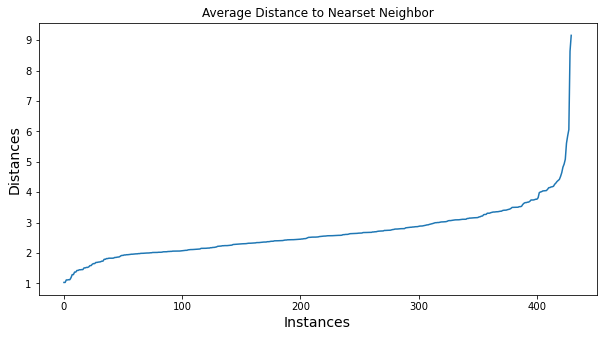

In [611]:
#But how was an epsilon of 10 determined?
#one method is to review the Avg. Distances to Nearest Neighbor graph and find its "elbow point"
nn_avg_distance(X) #elbow around 2 and 4, loop from 1-6

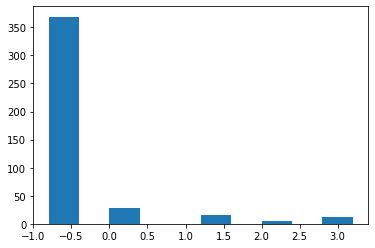

In [612]:
#plot the number of instances in each of the created clusters
plt.hist(y_pred, bins=10, align='right')
plt.show()

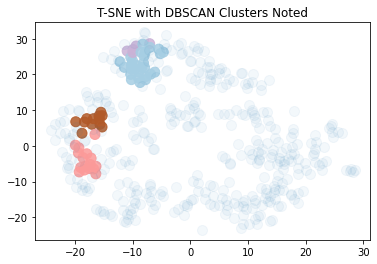

In [613]:
#plot DBSCAN results on a 2-dimensional tSNE of the same data set
dbscan_tsne_plot(X, y_pred)

# Guassian

In [615]:
# create a model and fit X

#set the k value to your best guess (or higher)
#n_init defines how many times to fit the model
bgm = BayesianGaussianMixture(n_components=15, n_init=10)  
bgm.fit(X)

BayesianGaussianMixture(n_components=15, n_init=10)

In [616]:
#let's look at the weights to possible clusters and zero to all unneeded clusters
weights = np.round(bgm.weights_,2)
weights

array([0.01, 0.08, 0.06, 0.11, 0.08, 0.04, 0.18, 0.1 , 0.11, 0.03, 0.01,
       0.1 , 0.04, 0.04, 0.  ])

In [617]:
#calculate the ideal k value (or just count the values above)
k = len(set(list(weights)))
k

9

In [619]:
#Let's train a Gaussian Mixture on this dataset. 
k = 9
gauss = GaussianMixture(n_components=k, random_state=42)
y_pred = gauss.fit_predict(X)

In [620]:
#save the predictions of each instance to a column called Gauss
data['Gauss'] = y_pred

In [621]:
#the most likely cluster (hard clustering) predictions made
y_pred

array([6, 7, 7, 7, 6, 1, 0, 8, 7, 7, 2, 6, 8, 4, 1, 1, 6, 6, 6, 4, 4, 4,
       6, 0, 2, 1, 0, 1, 8, 1, 8, 1, 1, 1, 3, 5, 6, 1, 1, 1, 7, 7, 8, 7,
       1, 7, 1, 4, 7, 4, 8, 7, 1, 1, 7, 4, 1, 1, 1, 8, 3, 7, 7, 4, 7, 0,
       7, 6, 5, 6, 7, 1, 1, 4, 6, 4, 4, 4, 7, 0, 3, 6, 4, 8, 7, 7, 4, 4,
       7, 3, 5, 4, 5, 0, 1, 4, 7, 4, 8, 6, 7, 6, 0, 0, 7, 1, 0, 5, 4, 6,
       4, 8, 1, 7, 7, 1, 7, 5, 7, 7, 7, 3, 1, 1, 7, 4, 6, 4, 7, 7, 5, 7,
       4, 8, 4, 7, 0, 8, 8, 3, 4, 4, 8, 8, 4, 4, 1, 4, 4, 1, 6, 4, 6, 2,
       6, 6, 8, 1, 6, 6, 7, 7, 1, 7, 6, 6, 6, 6, 3, 8, 7, 8, 0, 8, 1, 7,
       7, 8, 8, 7, 8, 5, 7, 5, 1, 7, 0, 5, 0, 5, 8, 8, 0, 3, 5, 4, 1, 0,
       8, 7, 6, 8, 8, 8, 8, 2, 0, 1, 1, 1, 7, 3, 0, 6, 7, 7, 1, 8, 6, 1,
       7, 3, 7, 7, 8, 8, 8, 0, 6, 7, 7, 7, 6, 7, 7, 7, 7, 7, 5, 7, 5, 1,
       4, 1, 2, 2, 7, 6, 6, 7, 4, 1, 8, 8, 1, 7, 5, 6, 6, 4, 4, 7, 6, 3,
       1, 7, 0, 5, 8, 7, 1, 7, 0, 0, 8, 0, 1, 8, 2, 6, 4, 4, 8, 6, 8, 0,
       0, 6, 8, 7, 4, 1, 1, 1, 7, 0, 8, 8, 2, 0, 8,

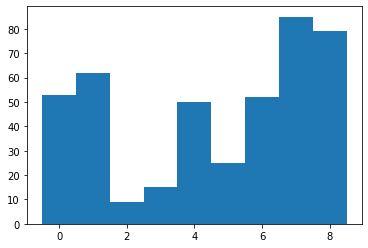

In [622]:
#plot the number of instances in each of the created clusters
plt.hist(y_pred, bins=range(k+1), align='left')
plt.show()

In [623]:
data[data['Institution Name']=='Villanova University']

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN,Gauss
393,Villanova University,7876,PA,46,0.29,60500,9,1169000,12240,53308,...,0.0768,0.0569,0.0006,0.0001,11165.0,0.6688,1,2,-1,1


In [624]:
group5=data[ y_pred == 1 ]
group5[30:]

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN,Gauss
162,Macalester College,2140,MN,25,0.41,27100,9,697000,10816,54344,...,0.0778,0.0801,0.0019,0.0005,10623.0,0.7790,1,2,-1,1
174,Middlebury College,2551,VT,7,0.17,49500,9,893000,20248,54450,...,0.1012,0.0706,0.0000,0.0004,11368.0,0.8654,0,2,1,1
184,Mount Holyoke College,2193,MA,32,0.51,22200,7,716000,13116,49998,...,0.0726,0.0977,0.0014,0.0018,10739.0,0.8831,0,2,-1,1
196,Occidental College,1907,CA,39,0.37,49500,7,751000,11749,54686,...,0.1435,0.1518,0.0000,0.0026,11293.0,0.7649,0,2,-1,1
207,Pepperdine University,5645,CA,50,0.36,135000,7,981000,9781,53932,...,0.1365,0.1014,0.0036,0.0022,12387.0,0.6016,1,2,-1,1
208,Pitzer College,1050,CA,35,0.13,18100,9,707000,10851,54056,...,0.1409,0.1035,0.0028,0.0028,11104.0,0.8720,0,2,-1,1
209,Pomona College,1559,CA,5,0.08,60500,10,937000,21239,52780,...,0.1769,0.1491,0.0039,0.0026,13451.0,0.9375,0,0,-1,1
216,Reed College,1453,OR,68,0.35,33100,9,577000,12364,56340,...,0.1023,0.0707,0.0021,0.0007,10712.0,0.9771,0,2,1,1
219,Rensselaer Polytechnic Institute,7798,NY,50,0.43,40500,8,1272000,9045,53880,...,0.0938,0.1360,0.0015,0.0002,12554.0,0.8838,0,2,-1,1
241,Santa Clara University,7569,CA,54,0.50,60500,9,1126000,11055,51711,...,0.1804,0.1637,0.0013,0.0022,12700.0,0.6376,1,2,-1,1


In [625]:
group5.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN,Gauss
count,62.000000,62.000000,62.000000,62.000000,62.000000,6.200000e+01,62.000000,62.000000,6.200000e+01,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,5147.354839,32.822581,0.267419,58046.774194,8.629032,9.838548e+05,14877.677419,53254.790323,4.046979e+05,0.108548,...,0.108689,0.102918,0.001934,0.001056,12409.629032,0.823384,0.258065,1.645161,-0.612903,1.0
std,3987.025507,26.007265,0.132997,35381.043909,1.176740,2.026262e+05,4320.626343,3790.659012,3.521864e+05,0.059115,...,0.035673,0.053854,0.002557,0.001093,1217.104145,0.124164,0.441142,0.770284,0.796608,0.0
min,887.000000,1.000000,0.080000,12100.000000,5.000000,5.770000e+05,8060.000000,28774.000000,3.616800e+04,0.030000,...,0.047700,0.030100,0.000000,0.000000,10158.000000,0.480500,0.000000,0.000000,-1.000000,1.0
25%,1993.250000,14.000000,0.155000,34950.000000,8.000000,8.622500e+05,11871.750000,52593.500000,1.541902e+05,0.070000,...,0.080475,0.059400,0.000525,0.000200,11614.250000,0.768925,0.000000,2.000000,-1.000000,1.0
50%,2928.500000,27.000000,0.245000,49500.000000,9.000000,9.370000e+05,14122.500000,53927.000000,3.375515e+05,0.095000,...,0.100150,0.096650,0.001250,0.000700,12154.000000,0.860850,0.000000,2.000000,-1.000000,1.0
75%,7879.000000,43.750000,0.367500,60500.000000,9.000000,1.122750e+06,17446.500000,55165.500000,4.923875e+05,0.130000,...,0.129200,0.138400,0.002450,0.001775,12938.500000,0.895675,0.750000,2.000000,-1.000000,1.0
max,14741.000000,125.000000,0.540000,165000.000000,10.000000,1.477000e+06,33452.000000,56960.000000,1.458439e+06,0.370000,...,0.218200,0.315900,0.017200,0.004500,15579.000000,1.000000,1.000000,2.000000,1.000000,1.0


In [626]:
group6=data[ y_pred == 2 ]
group6

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN,Gauss
10,Azusa Pacific University,7194,CA,228,0.69,40500,6,772000,10085,38880,...,0.3322,0.0950,0.0029,0.0106,9160.0,0.4042,1,3,-1,2
24,Biola University,4656,CA,185,0.73,40500,8,627000,7526,40488,...,0.2132,0.1748,0.0017,0.0065,9348.0,1.0000,1,3,-1,2
153,Linfield College-McMinnville Campus,1334,OR,117,0.81,14800,6,851000,12608,43302,...,0.1780,0.0454,0.0089,0.0141,7058.0,0.9836,1,3,-1,2
205,Pacific University,3725,OR,185,0.85,22200,5,667000,7418,44298,...,0.1571,0.1066,0.0055,0.0225,8264.0,0.6338,0,3,-1,2
244,Seattle Pacific University,3125,WA,192,0.90,22200,7,714000,7749,42939,...,0.1286,0.1279,0.0021,0.0080,8536.0,0.5207,1,3,-1,2
245,Seattle University,5904,WA,139,0.76,49500,9,826000,11226,44610,...,0.1260,0.1615,0.0028,0.0086,9586.0,0.6996,1,3,-1,2
278,The College of Idaho,928,ID,117,0.49,14800,8,595000,6938,30155,...,0.1395,0.0234,0.0032,0.0096,7029.0,0.6119,0,3,-1,2
298,University of Alaska Fairbanks,3237,AK,263,0.76,12100,3,632000,14248,13438,...,0.0782,0.0195,0.1376,0.0082,9584.0,0.6066,0,3,-1,2
321,University of Hawaii at Manoa,13329,HI,166,0.84,49500,6,731000,14622,22986,...,0.1159,0.3927,0.0013,0.0272,12163.0,0.7707,0,1,-1,2


In [627]:
group6.describe()

,EnrollmentFullTime,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,Endowment per Full Time Student,Percentage of International Students,...,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN,Gauss
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0
mean,4825.777778,176.888889,0.758889,29566.666667,6.444444,712777.777778,10268.888889,35677.333333,41786.888889,0.035556,...,0.163189,0.127422,0.018444,0.012811,8969.777778,0.692344,0.555556,2.777778,-1.0,2.0
std,3760.292667,48.881092,0.120046,15343.891293,1.810463,90564.587143,3047.537672,11093.519584,35414.261776,0.029202,...,0.074096,0.114269,0.044745,0.007244,1550.834515,0.198562,0.527046,0.666667,0.0,0.0
min,928.000000,117.000000,0.490000,12100.000000,3.000000,595000.000000,6938.000000,13438.000000,3171.000000,0.000000,...,0.078200,0.019500,0.001300,0.006500,7029.000000,0.404200,0.000000,1.000000,-1.0,2.0
25%,3125.000000,139.000000,0.730000,14800.000000,6.000000,632000.000000,7526.000000,30155.000000,18447.000000,0.020000,...,0.126000,0.045400,0.002100,0.008200,8264.000000,0.606600,0.000000,3.000000,-1.0,2.0
50%,3725.000000,185.000000,0.760000,22200.000000,6.000000,714000.000000,10085.000000,40488.000000,33195.000000,0.030000,...,0.139500,0.106600,0.002900,0.009600,9160.000000,0.633800,1.000000,3.000000,-1.0,2.0
75%,5904.000000,192.000000,0.840000,40500.000000,8.000000,772000.000000,12608.000000,43302.000000,40851.000000,0.040000,...,0.178000,0.161500,0.005500,0.014100,9584.000000,0.770700,1.000000,3.000000,-1.0,2.0
max,13329.000000,263.000000,0.900000,49500.000000,9.000000,851000.000000,14622.000000,44610.000000,107023.000000,0.100000,...,0.332200,0.392700,0.137600,0.027200,12163.000000,1.000000,1.000000,3.000000,-1.0,2.0


In [628]:
#group the data by their Gauss, KMeans and DBSCAN values and then take a count
pairedSchools = data.groupby(by=['Gauss','KMeans','DBSCAN']).count()

#keep only those combinations that had more than 1 Stock Ticker
pairedSchools = pairedSchools[pairedSchools['Institution Name']>1]

#display the paired combinations
pairedSchools['Institution Name']

Gauss  KMeans  DBSCAN
0      0       -1        18
       1       -1        32
       2       -1         3
1      0       -1        11
       2       -1        39
                1        12
2      3       -1         8
3      0       -1        15
4      2       -1        25
                1         4
                3         7
       3       -1         8
                3         5
5      1       -1        23
       3       -1         2
6      1       -1         7
       2       -1         4
       3       -1        41
7      3       -1        52
                0        27
                2         5
8      1       -1        69
       3       -1        10
Name: Institution Name, dtype: int64

In [636]:
reg=data[(data.Gauss==1) & (data.KMeans==2) & (data.DBSCAN == -1)]
reg

,Institution Name,EnrollmentFullTime,State,Rank,Undergraduate Admit Rate,Google Avg Monthly Search Volume,Student Life Grade,30-Year NPV,Instructional Wages per Full-Time Student,Average Undergraduate Tuition and Fees,...,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,AVGFACSAL,PFTFAC,Religious_new,KMeans,DBSCAN,Gauss
5,Amherst College,1855,MA,2,0.13,60500,10,1015000,18413,56426,...,0.1283,0.1509,0.0049,0.0000,12975.0,0.9158,0,2,-1,1
27,Bowdoin College,1825,ME,6,0.10,49500,10,1018000,17111,53922,...,0.1036,0.0751,0.0022,0.0011,12120.0,0.8588,0,2,-1,1
29,Brandeis University,5267,MA,40,0.31,49500,5,858000,15216,55395,...,0.0830,0.1403,0.0006,0.0017,13176.0,0.6805,0,2,-1,1
32,Bryn Mawr College,1632,PA,27,0.34,27100,9,838000,12930,52360,...,0.0990,0.1293,0.0000,0.0007,10936.0,0.8462,0,2,-1,1
33,Bucknell University,3621,PA,35,0.33,49500,8,1059000,12873,56092,...,0.0692,0.0567,0.0006,0.0000,11423.0,0.9640,0,2,-1,1
44,Chapman University,8598,CA,125,0.54,90500,9,772000,9015,52724,...,0.1573,0.1304,0.0016,0.0031,11826.0,1.0000,1,2,-1,1
46,Claremont McKenna College,1324,CA,7,0.09,12100,8,1147000,18091,54405,...,0.1525,0.1108,0.0000,0.0008,14628.0,0.9243,0,2,-1,1
56,College of the Holy Cross,2913,MA,27,0.38,22200,8,1061000,11361,52770,...,0.0999,0.0439,0.0010,0.0007,11320.0,0.8792,1,2,-1,1
58,Colorado School of Mines,5801,CO,84,0.49,40500,7,1364000,8060,28774,...,0.0921,0.0446,0.0037,0.0006,12065.0,0.9613,0,2,-1,1
72,Davidson College,1843,NC,17,0.19,49500,9,929000,13095,51447,...,0.0810,0.0522,0.0049,0.0016,11547.0,0.9509,1,2,-1,1


In [639]:
reg['UGDS_WHITE'].describe()

count    39.000000
mean      0.559631
std       0.122047
min       0.313800
25%       0.472200
50%       0.529600
75%       0.665300
max       0.807400
Name: UGDS_WHITE, dtype: float64